# Logistic Regression

Logistic Regression or Logit Regression is a regression model where the dependent variable is categorical. The model is composed of some set of variable weights, w, and takes in data, x, to make predictions about y, the dependant variable. 

## Binary Classification
The simplest case of logistic regression is binary classification. That is, where the output can take on one of two values. For some variable y it must belong to a set A which is typically written as: 

\begin{align} y \in A = (0,1) \end{align} 

A could similarly be written to take on values like ('Pass','Fail'), (True,False), ('Heads','Tails') et cetra. 

Logistic Regression tries to estimate y by finding the answer to:

\begin{align} \hat y & = P(y=1|x,w,b) \\ & = \sigma(w,x,b) = \frac1{1+e^{-wx+b}}\end{align}


## The Sigmoid Function
\begin{align} \sigma(z) = \frac1{1+e^{-z}}\end{align}

The first question you might have is: Why do we want to use the sigmoid function? The following python code will plot the sigmoid function for some input z



In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

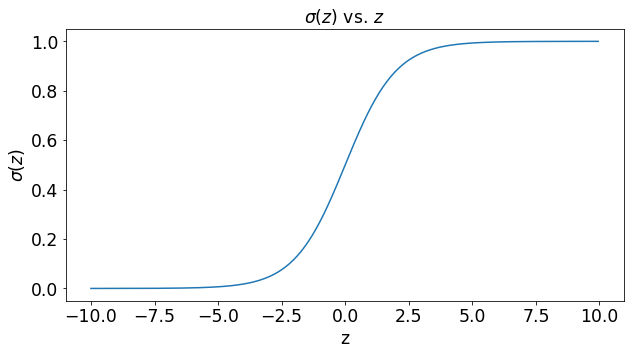

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-10,10,.05)
a = sigmoid(z)

fig1 = plt.figure()
plt.title(r'$\sigma(z)$ vs. $z$')
plt.ylabel(r'$\sigma(z)$')
plt.xlabel('z')
plt.plot(z,a)
plt.show()

Upon closer look, we can see that the sigmoid function takes on values continuously between 0 and 1 which is ideal for the creation of the probability function we require for binary classification.

## Logistic Regression Computational Graph

A compuational graph of logistic regression can be made that makes it easy to see the steps required to generate estimates. That graph can be seen below

\begin{align}
Given: \mathbf{W} &  =  
            \begin{bmatrix}
                w_1 \\
                w_2 \\
            \end{bmatrix}
            \mathbf{, X} = \begin{bmatrix}
                x_1 \\
                x_2 \\
            \end{bmatrix} \\\\
z(w,x,b)& = w_1*x_1+w_2*x_2+b \\\\ 
        & = \mathbf{W}^T\mathbf{X}+b \\\\ 
\hat y  & = \sigma (z) 
\end{align}

This should make it fairly clear how to compute estimates of y via y hat

## Computing the Cost Function
Now that our model can generate estimates, how can we calculate the required updates of our model parameters (w,b) in order to correct the error between our model and the true value?

The function that calculates this error on a sample by sample basis is called the loss function. It generally takes the form of:
\begin{equation} \mathcal{L}(\hat y , y) \end{equation}

This equation takes the estimate of y and y and returns a metric of the difference between the two.

With logistic regression that loss function typically takes on the form 

\begin{equation} \mathcal{L}(\hat y,y) = ylogP(y=1)+(1-y)logP(y=0)
\end{equation}

Talking through it, it states that if the label y is equal to 1, then the loss is equal to log(P(y=1)|x,w,b). If the label is zero then the loss is equal to log(P(y=0|x,w,b))

The Cost function is computed over many examples of x and y. Therefore the cost function is an average of the output of the loss function computed as

\begin{align} J(\hat y,y) & = -\frac1m\sum_{i=1}^my^{(i)}logP(y^{(i)}=1)+(1-y^{(i)})logP(y^{(i)}=0) \\\\ & = -\frac1m\sum_{i=1}^m\mathcal{L}(\hat y,y)
\end{align}

## Updating Parameters From Cost
How do we actually update the parameters of linear regression as a function of the loss?  Prefereably we'd take a look at the loss function and try to move the parameters so that the loss function is minimized. This can be achived by finding the gradient of the loss function with respect to the parameters and applying it to the original parameter. We must find:

\begin{equation} \frac{d\mathcal{L}(w,b)}{dw} = \frac{d\mathcal{L}(\theta)}{dw}  \end{equation}

from the equations in section 4 we can deduce through the chain rule that:

\begin{equation} \frac{d\mathcal{L}(\theta)}{d\theta} = \frac{d\mathcal{L}(\theta)}{d\hat y}*\frac{d\hat y}{dz}*\frac{dz}{d\theta} \end{equation}

as a result we can surmise that:

\begin{align} 
\frac{d\mathcal{L}(\theta)}{d\hat y} & = -\frac{y}{\hat y}+\frac{1-y}{1-\hat y} \\\\
\frac{\hat y}{dz}          & = (\hat y)*(1-\hat y) \\\\
\frac{dz}{dw_n}            & = x_n \frac{dz}{db} = 1
\end{align}

and therefore:
\begin{align} \frac{d\mathcal{L}(\theta)}{dw_n} & = (-\frac{y}{\hat y}+\frac{1-y}{1-\hat y})*(\hat y)*(1-\hat y)*x_n \\\\ 
\frac{d\mathcal{L}(\theta)}{db} & = (-\frac{y}{\hat y}+\frac{1-y}{1-\hat y})*(\hat y)*(1-\hat y)
\end{align}

Once we've computed these gradients, we can update each parameter by nudging the parameters by some step size in the direction of the gradient. This will have the result of reducing the cost the new model would generate if it observed the same input samples. This is just one way in which we can update the logistic regression model, in order to learn more about this process check out the post on optimization algorithms.

Of course, we typically wont update the model off of the basis of a single input sample. We'd want compute the gradient of the cost function. Following from above this simply becomes:

\begin{align} \frac1m\sum_{(i=1)}^m\frac{d\mathcal{L}(\theta)}{dw_n} & = (-\frac{y^{(i)}}{\hat y^{(i)}}+\frac{1-y^{(i)}}{1-\hat y^{(i)}})*(\hat y^{(i)})*(1-\hat y^{(i)})*x_n \\\\ 
\frac1m\sum_{(i=1)}^m\frac{d\mathcal{L}(\theta)}{db} & = (-\frac{y^{(i)}}{\hat y^{(i)}}+\frac{1-y^{(i)}}{1-\hat y^{(i)}})*(\hat y^{(i)})*(1-\hat y^{(i)})
\end{align}

Now we have all the elements required to update our logistic regression model with stochastic gradient descent. The process follows the following flow diagram

** Logistic Regression with Stochastic Gradient Descent **
1. Wrangle data
2. Initialize model
3. Compute model estimates from samples
4. Compute updates
5. Apply updates
6. Repeat steps 3, 4, and 5

this process is reflected in the code below:

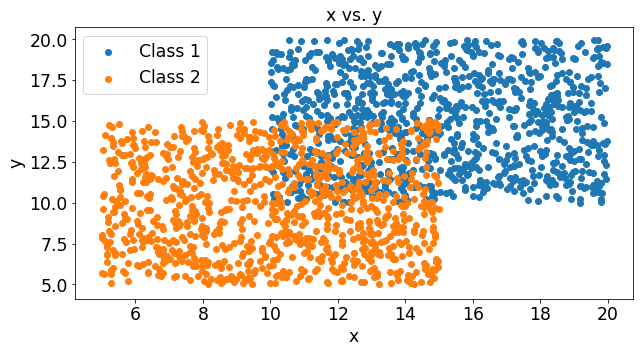

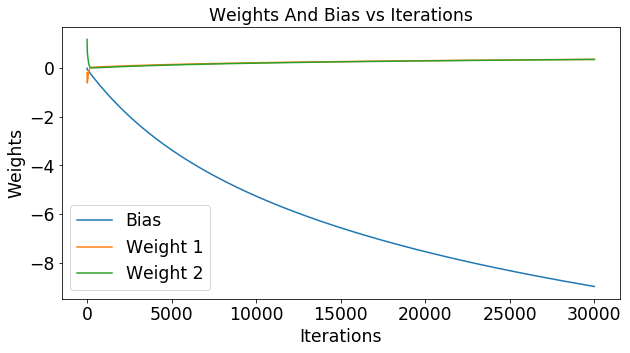

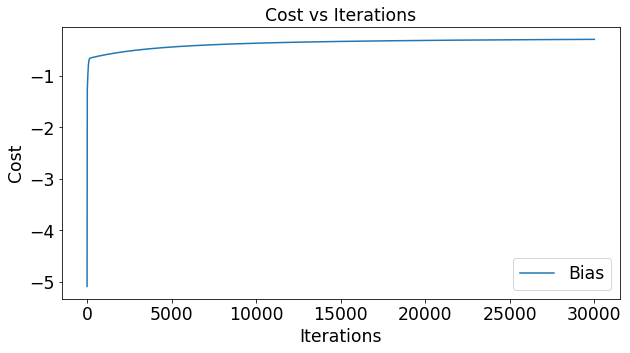

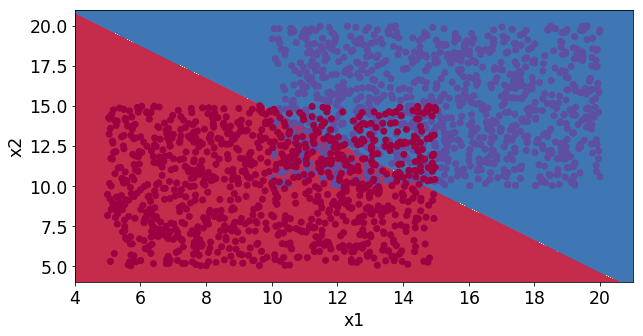

In [32]:
# Wrangle Data
n    = 30000 # number of steps
m    = 1000  # Samples per step
k    = 2    # number of features
dims = {'numExperiments':0,'numSamps':1}
class1 = np.random.uniform(10,20,(k,m))
class2 = np.random.uniform(5,15,(k,m))
x = np.concatenate((class1,class2),axis=1)
y = np.concatenate((np.ones((1,m)), np.zeros((1,m))),axis = 1)

plt.show()
fig = plt.figure()
plt.title('x vs. y')
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(class1[1],class1[0],label='Class 1')
plt.scatter(class2[1],class2[0],label='Class 2')
plt.legend()

eps = 1/(10**7) # for numerical stability

# Initialize Model
weights = np.random.randn(k,1) # Initialize the weights to a random value
bias    = 0                    # Initialize bias parameter to 0
learningRate = .01
biasLog = []
weightLog1 = []
weightLog2 = []
costLog   = []

for i in range(n):
    biasLog.append(bias)
    weightLog1.append(weights[0])
    weightLog2.append(weights[1])
    # Compute the model estimates recall z = w'x+b a = sigma(z)
    z = np.dot(weights.transpose(),x)+bias
    a = sigmoid(z)

    # Compute the Updates
    J = (y*np.log(a)+(1.0-y)*np.log(1-a))
    costLog.append(np.mean(J,axis=1))
    dyhat = (-y/(a+(eps)))+(1.-y)/((1.-a)+(eps))
    dz = a*(1.-a)
    dwn = x

    dw = np.mean(dyhat*dz*x,axis=1,keepdims=True)
    db = np.mean(dyhat*dz,axis=1,keepdims=True)

    # Apply Updates
    weights = weights - learningRate*dw
    bias    = bias-learningRate*db
    
def prediction(weights,bias,x):
    z = np.dot(weights.transpose(),x)+bias
    a = sigmoid(z)>.5
    return(a)

fig2 = plt.figure()
plt.title('Weights And Bias vs Iterations')
plt.ylabel('Weights')
plt.xlabel('Iterations')
plt.plot(range(n),biasLog,label='Bias')
plt.plot(range(n),weightLog1,label='Weight 1')
plt.plot(range(n),weightLog2,label='Weight 2')
plt.legend()
plt.show()

plt.title('Cost vs Iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(n),costLog,label='Bias')
plt.legend()
plt.show()




def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
plot_decision_boundary(lambda xin:prediction(weights,bias,xin.T),x,y)

We can see that these two classes slightly overlap and the stochastic gradient decent algorthm finds the decision line that minimizes the errors. 

## Impact of Samples per Update
Lets say that the function you use to estimate y is completely random. What would that mean for the cost function? Below we've plotted the cost for 1000 experiments that had 2 samples in each experiment. In the figure below you can see the cost of each of these experiments. You can see that a random guesser produces an average cost of around .74 and a fairly large variance of .04.

In [ ]:

# Set up variables
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

# Import movie writer
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=2, metadata=metadata)

# Compute Loss
def computeLoss(y,yhat):
    return y*np.log(yhat)+(1-y)*np.log(1-yhat)

# Compute sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Setup figure
fig = plt.figure()
plt.ylabel(r'Cost') 
plt.xlabel('Experiment')
l, = plt.plot([], [],'o')
plt.xlim(0, 1000)
plt.ylim(.25,1.25)

with writer.saving(fig, "writer_test.mp4", 100):
    n    = 1000 # number of experiments
    dims = {'numExperiments':0,'numSamps':1}
    var  = []
    mu   = []
    
    for m in range(1,100,4):
        y    = np.random.uniform(0,1,(n,m))>.5
        
        yhat = sigmoid(np.random.uniform(0,1,(n,m)))        
        
        loss = computeLoss(y,yhat)
        
        cost = -(np.mean(loss,axis=dims['numSamps']))
        
        mu = np.mean(cost)
        
        var = np.var(cost)
        
        plt.title(r'Experiment (%d samples) vs. Cost $\mu$ = %.3f $\sigma$(cost)=%.3f)' % (m,mu,var))
        
        l.set_data(range(n), cost)
        writer.grab_frame()

plt.close(fig)

The graph below shows the effect of increasing the number of samples per experiment on the variance of the cost function. As the number of samples goes up, the variance in the ultimate cost estimate drops. This means that you will more reliably move down the cost function in the right direction as you base your decision on more data. 


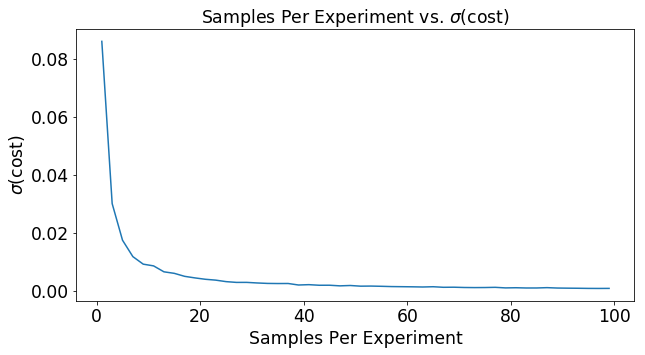

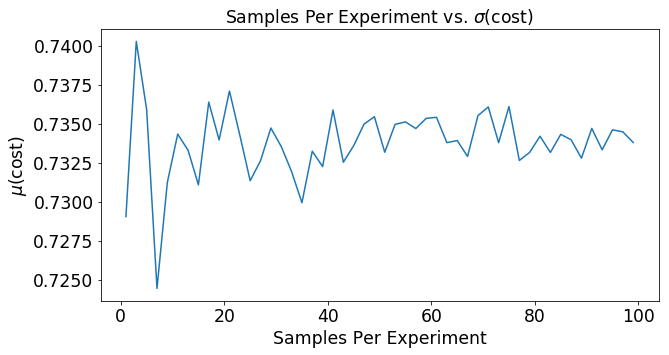

In [34]:
n    = 1000 # number of experiments
mSet = range(1,100,2) # samples per experiment
dims = {'numExperiments':0,'numSamps':1}
var  = []
mu   = []

def computeLoss(y,yhat):
    return y*np.log(yhat)+(1-y)*np.log(1-yhat)

for m in mSet:
    yhat = sigmoid(np.random.uniform(0,1,(n,m)))
    y    = np.random.uniform(0,1,(n,m))>.5
    loss = computeLoss(y,yhat)
    cost = -(np.mean(loss,axis=dims['numSamps']))
    mu.append(np.mean(cost))
    var.append(np.var(cost))
    


# Compute the cost function of each sample

fig = plt.figure()
plt.title(r'Samples Per Experiment vs. $\sigma$(cost)')
plt.xlabel(r'Samples Per Experiment') 
plt.ylabel('$\sigma$(cost)')
plt.plot(mSet,var)
plt.show()
fig = plt.figure()
plt.title(r'Samples Per Experiment vs. $\sigma$(cost)')
plt.xlabel(r'Samples Per Experiment') 
plt.ylabel('$\mu$(cost)')
plt.plot(mSet,mu)
plt.show()

And thats all I have to say about logistic regression with stochastic gradient decent! There are many different methods to optimize stochastic gradient decent. Maybe we'll take a look at that in a later post